In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
from cartopy import crs as ccrs
import geopandas
import os

In [2]:
url="https://raw.githubusercontent.com/sophalITC/datasci/master/WHO-COVID-19-global-data.csv"
covid = pd.read_csv (url)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
covid
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [4]:
dfc = pd.DataFrame(covid)
df3 = dfc.rename({'Name': 'name'}, axis=1)

In [5]:
df3

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
180115,2022-01-27,ZW,Zimbabwe,AFRO,167,228943,5,5321
180116,2022-01-28,ZW,Zimbabwe,AFRO,153,229096,3,5324
180117,2022-01-29,ZW,Zimbabwe,AFRO,237,229333,9,5333
180118,2022-01-30,ZW,Zimbabwe,AFRO,82,229415,0,5333


In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [7]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [8]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


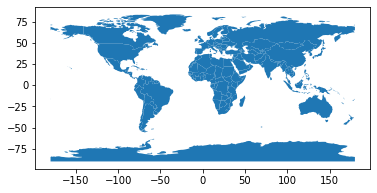

In [9]:
world.plot();

In [10]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [11]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

C:\Users\Sophal\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


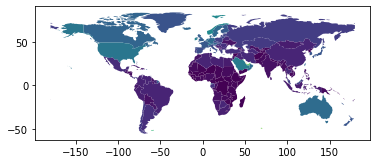

In [26]:
world.plot(column='gdp_per_cap');

<AxesSubplot:>

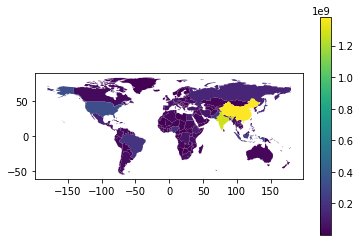

In [31]:
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est', ax=ax, legend=True)

In [32]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<AxesSubplot:>

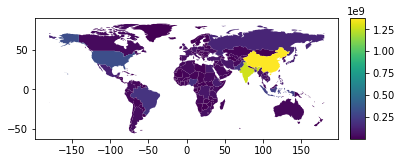

In [33]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

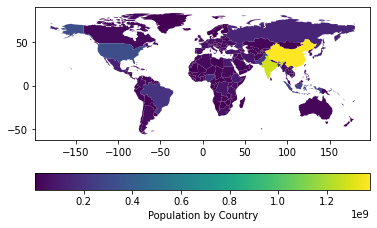

In [35]:
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})


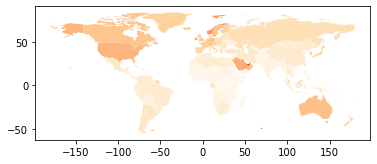

In [36]:
world.plot(column='gdp_per_cap', cmap='OrRd');

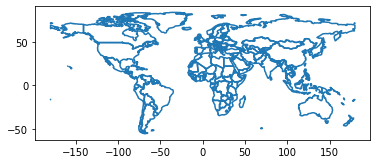

In [37]:
world.boundary.plot();

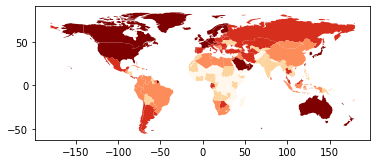

In [38]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');